## Before we start

This **notebook, presentation, functions and data** can be retrieved from GitHub:

    git clone https://github.com/Kleurenprinter/prompred.git






<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div.output_prompt').show();
 $('.alert-success').hide();
 $('.alert-danger').show();
 } else {
 $('div.input').show();
 $('div.output_prompt').show();
 $('.alert-success').show();
 $('.alert-danger').hide();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>


<p style="padding-top:1in">
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
</p>
<div class="alert alert-success">
    <b>CODE SHOW </b>: turned ON
</div>
<div class="alert alert-danger">
    <b>CODE SHOW </b>: turned OFF
</div>

In [50]:
import matplotlib.pyplot as plt
from prompred import *
import numpy as np
import math
import sklearn
import warnings
import pandas as pd
from IPython.core.display import HTML
warnings.filterwarnings('ignore')

%matplotlib inline

# The application of machine learning techniques in promoter engineering of prokaryotic microorganisms


**[Jim Clauwaert](jim.clauwaert@ugent.be)** 

*Research update*

December 2016


# Machine Learning
<img src="images/ml.png" width="100%">



# Promoter Engineering

- Predict the strength of a promoter sequence used in E.coli using machine learning techniques.

- Make predictions of the promoter strength in function of the sigma factor used by the RNA polymerase.

# Data

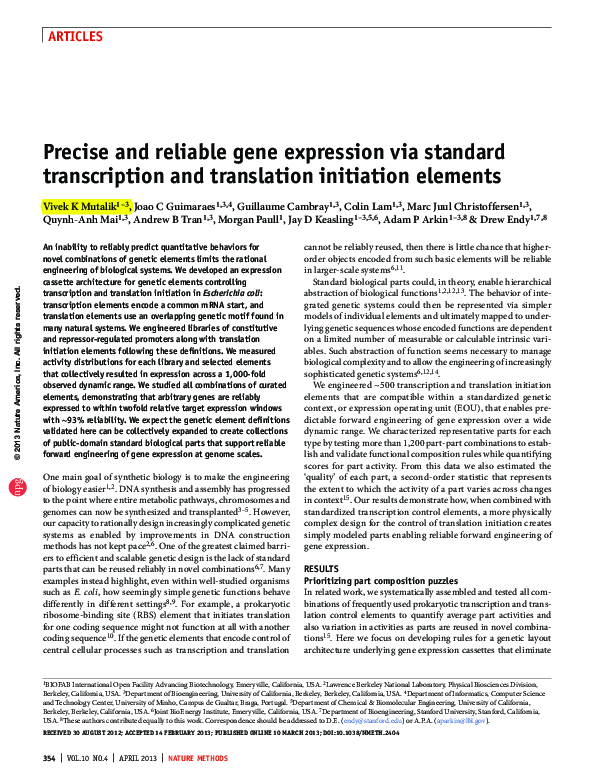

In [51]:
from wand.image import Image 
Image(filename='pdf/Mutalik2013.pdf')

### Mutalik Database

**254** promoters
- 137 *randomized* promoters: randomization within 35- and 10-box
- 117 *modulated* promoters: promoters built from a set of fragments


**varying** properties
- sequence length: $[35,49]$
    - $  \neq $  spacer lengths 
    - up-element

**Insulated** promoters

In [52]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 90000;

<IPython.core.display.Javascript object>

# Feature creation and selection

## nucleotides with respictive positions


<img src="images/sequence1.png" width="100%">

In [53]:
dfDatasetOrder = pd.read_csv("data/mut_rand_mod_lib.csv")
dfDataset = dfDatasetOrder.reindex(np.random.permutation(dfDatasetOrder.index))
dfDataset.iloc[:5, 0:2]

,ID,sequence
208,apFAB296,TTCACTTTTAATCATCCGGCTCGTATAATGTGTGGA
139,apFAB193,TTAAGGCTTAATCATCCGGCTCGTATAATGTGTGGA
33,apFAB63,TTGACAATTAATCATCCGGCTCGTAGATTTAACGTAT
156,apFAB212,TTCGTTTTTAATCATCGGCTCGTATAATGTGTGGA
85,apFAB119,TCGACATCGCATCTTTTTGTACCATACTTACAGCCAT


## Creation of two reference regions
<img src="images/refreg.png">

## Creation of dummy variables for every position
<img src="images/dummy.png">

In [54]:
#sequence range
seqRange = [-47,1]

#regions of interest (wrt 35- and 10-box)
ROI =  [[-12,14],[-8,12]]

#
labels, positionBox, spacer = regionSelect(dfDataset, ROI, seqRange)
print(dfDataset['sequence'][0],"\n",positionBox.values[0])


AAAAAGAGTATTGACTTAAAGTCTAACCTATAGGATACTTACAGCCAT 
 [1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]


# Data Preprocessing

## Sequence annotation

- add reference regions to used sequences

In [55]:
dfDataset.iloc[:5,[1,2,4,5]].style.set_properties(**{"font-size":"12px"})

## Labels

- create homogenous distribution to keep estimation confidence interval over full range at a minimum

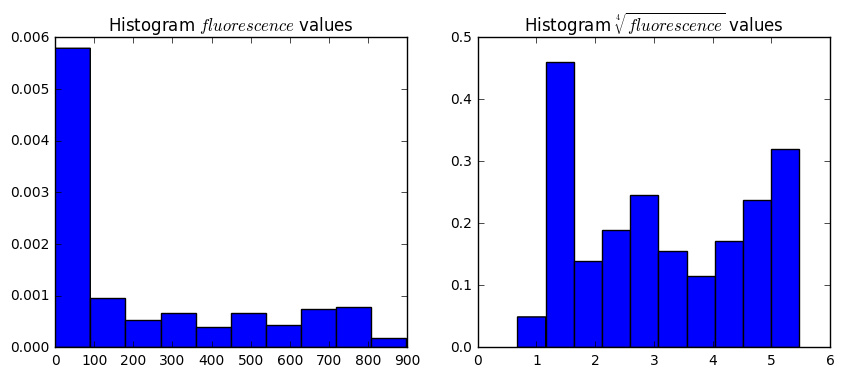

In [56]:
yData = dfDataset['mean_score']
yRooted = [math.sqrt(math.sqrt(u)) for u in yData]
plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.hist(yData,10,normed=1)
plt.title('Histogram $fluorescence$ values')
plt.subplot(122)
plt.hist(yRooted,10,normed=1)
plt.title('Histogram $\sqrt[4]{fluorescence}$ values')

# Code Implementation

<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div.output_prompt').show();
 $('.alert-success').hide();
 $('.alert-danger').show();
 } else {
 $('div.input').show();
 $('div.output_prompt').show();
 $('.alert-success').show();
 $('.alert-danger').hide();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.

<div class="alert alert-success">
    <b>CODE SHOW </b>: turned ON
</div>
<div class="alert alert-danger">
    <b>CODE SHOW </b>: turned OFF
</div>

# Supported models


- **Ordinary Least Squares**: `OLS`
        Parameters: coef0
- **Ridge Regressen**: `ridge`
        Parameters: alpha, coef0
- **Lasso Regression**: `lasso`
        Parameters: alpha, coef0
- **Random Forests (Classification + Regression)** : `forestReg, forestClass`
        Parameters: max_depth, max_features, min_samples
- **Support vectors (Classification + Regression) **: `SVR`, `SVC`
        Parameters: alpha, gamma, coef0
        Kernels: poly, RBF, sigmoid, ...
- **Ridge regression kernels**: `ridge`
        Parameters: alpha, gamma, coef0
        Kernels: poly, RBF, sigmoid, ...

# K-fold cross validation

<img src="images/k-fold.png" width="100%">

# Nested K-fold cross validation

<img src="images/nested-k-fold.png" width="100%">

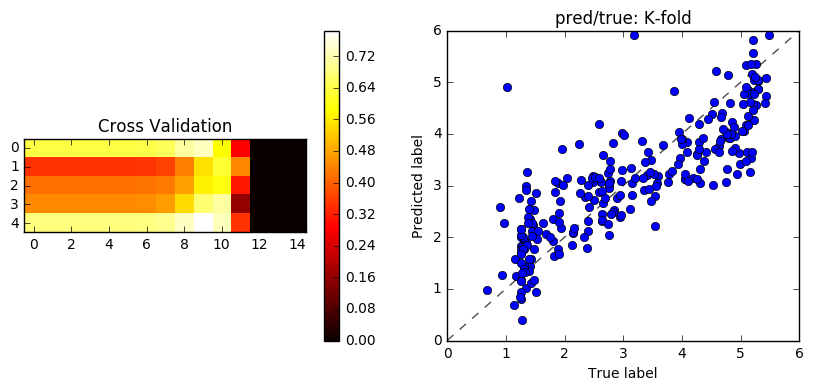

In [57]:
# Model specification
parModel = {"regType":'ridge', "poly":3, "kernel":"poly", "coef0":1}
# To be evaluated parameter(s)
parLabel = ['alpha']
parRange = [15] 
# Define kfold validation parameters
testSize = 0.2 
k = 5 
kInner = 5
#
X = positionBox.values
y = yRooted
# Run function
scoresParCV, optimalParCV = KfoldCV(X,y,k,parModel,parLabel[0],parRange[0]) 

In [58]:
meanScores = np.mean(np.ndarray.max(scoresParCV,axis=1))
print("K FOLD CV \n---------- \n\n Maximum Score: ",np.max(scoresParCV), "\n Mean optimal score: ", meanScores ,"\n sd optimal scores: ", math.sqrt(np.sum(np.power((np.ndarray.max(scoresParCV,axis=1)-meanScores),2)))   , "\n Optimal parEval:\n", optimalParCV, "\n parEval Scores:\n", scoresParCV,"\n\n\n")\

K FOLD CV 
---------- 

 Maximum Score:  0.785407953138 
 Mean optimal score:  0.690612808272 
 sd optimal scores:  0.15551152734505247 
 Optimal parEval:
 [  10.  100.  100.  100.   10.] 
 parEval Scores:
 [[ 0.64000896  0.64000898  0.64000913  0.64001064  0.64002572  0.64017631
   0.64165677  0.65440854  0.71102756  0.73332416  0.58453554  0.28645268
  -1.03522744 -3.59988033 -4.40901225]
 [ 0.3456577   0.34565772  0.34565792  0.34565996  0.34568038  0.34588416
   0.34788596  0.36497944  0.43814765  0.55085317  0.62445529  0.44582983
  -0.96501248 -3.03148647 -3.6797314 ]
 [ 0.41983757  0.41983758  0.41983771  0.41983904  0.41985236  0.41998502
   0.42126945  0.43112649  0.47275168  0.57033389  0.59814351  0.31496053
  -1.12928799 -3.96829481 -4.87627816]
 [ 0.45035812  0.45035814  0.45035838  0.45036073  0.45038427  0.45061899
   0.45290295  0.4712244   0.54357037  0.67468962  0.71173312  0.16034233
  -2.2082173  -5.19652742 -6.0530184 ]
 [ 0.6822239   0.68222392  0.68222412  0.6822

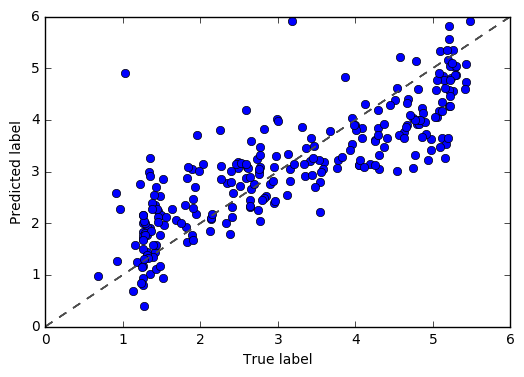

In [59]:
scoresParNCV, optimalParNCV, scoresNCV = nestedKfoldCV(X,y,k,kInner,parModel,parLabel[0],parRange[0])    

In [60]:
print("NESTED K FOLD CV \n----------------- \n\n Maximum Score: ",np.max(scoresParNCV), "\n Mean optimal score: ", np.mean(scoresParNCV) ,"\n sd optimal scores: ", math.sqrt(np.sum(np.power((np.ndarray.max(scoresParCV,axis=1)-np.mean(scoresParNCV)),2))) , "\n Optimal parEval:\n", optimalParNCV, "\n parEval Scores:\n", scoresParNCV,"\n\n\n")

NESTED K FOLD CV 
----------------- 

 Maximum Score:  0.785407953138 
 Mean optimal score:  0.690612808272 
 sd optimal scores:  0.15551152734505247 
 Optimal parEval:
 [[  10.   10.   10.   10.   10.]
 [ 100.  100.  100.  100.  100.]
 [ 100.  100.  100.  100.  100.]
 [ 100.  100.  100.  100.  100.]
 [  10.   10.   10.   10.   10.]] 
 parEval Scores:
 [ 0.73332416  0.62445529  0.59814351  0.71173312  0.78540795] 





# Validation

<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div.output_prompt').show();
 $('.alert-success').hide();
 $('.alert-danger').show();
 } else {
 $('div.input').show();
 $('div.output_prompt').show();
 $('.alert-success').show();
 $('.alert-danger').hide();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.

<div class="alert alert-success">
    <b>CODE SHOW </b>: turned ON
</div>
<div class="alert alert-danger">
    <b>CODE SHOW </b>: turned OFF
</div>

# Something about rank
** Spearman's rank correlation coefficient**



# Anderson promoter library

- 19 well-recognized promoters
- recovered by Chris Anderson
- sequence range: $   [-35,1]$
- single nucleotide variations


In [61]:
dfDatasetTest = pd.read_csv("data/anderson_lib.csv")
dfDatasetTest['sequence'] = dfDatasetTest['sequence'].str.upper()
dfDatasetTest.iloc[:5,:3]

,ID,sequence,mean_score
0,BBa_J23100,TTGACGGCTAGCTCAGTCCTAGGTACAGTGCTAGC,1.00
1,BBa_J23101,TTTACAGCTAGCTCAGTCCTAGGTATTATGCTAGC,0.70
2,BBa_J23102,TTGACAGCTAGCTCAGTCCTAGGTACTGTGCTAGC,0.86
3,BBa_J23103,CTGATAGCTAGCTCAGTCCTAGGGATTATGCTAGC,0.01
4,BBa_J23104,TTGACAGCTAGCTCAGTCCTAGGTATTGTGCTAGC,0.72


SpearmanrResult(correlation=0.80728709394205445, pvalue=2.9393274121457126e-05)


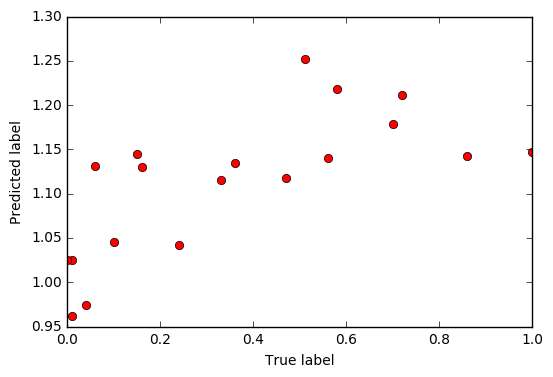

In [62]:
labelsTest, positionBoxTest, spacerTest = regionSelect(dfDatasetTest, ROI, seqRange)
Xtest = positionBoxTest.values

parInput = {"regType":'ridge', "poly":3, "kernel":'poly', "gamma":0.1, "alpha": 10000, "coef0":1} 
reg = selectRegression(**parInput)
reg.fit(X,y)
rankPredict = reg.predict(Xtest)

#print(np.transpose(np.vstack((dfDatasetTest['sequence'].values,dfDatasetTest['mean_score'].values,rankPredict))))
print(stats.spearmanr(dfDatasetTest['mean_score'].values,rankPredict))
plt.plot(dfDatasetTest['mean_score'].values,rankPredict, 'ro')
plt.xlabel('True label')
plt.ylabel('Predicted label')

<img src="images/brewster.png" align="top" width="100%"> 

- 18 promoters
- sequence range: $   [-40,-1]$
- single nucleotide variations focused in and around TATA- and TTGACA-box 



In [63]:
dfDatasetTest = pd.read_csv("data/brewster_lib.csv")
dfDatasetTest.iloc[:5,:3].style.set_properties(**{"font-size":"12px"})

SpearmanrResult(correlation=0.34255922865570765, pvalue=0.040839010065422274)


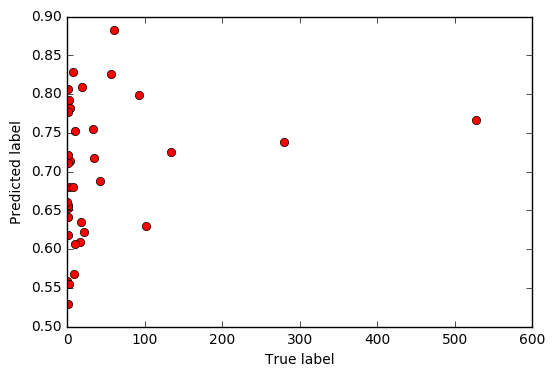

In [48]:
labelsTest, positionBoxTest, spacerTest = regionSelect(dfDatasetTest, ROI, seqRange)
Xtest = positionBoxTest.values

rankPredict = reg.predict(Xtest)
#print(np.transpose(np.vstack((dfDatasetTest['sequence'].values,dfDatasetTest['mean_score'].values,rankPredict))))
print(stats.spearmanr(dfDatasetTest['mean_score'].values,rankPredict))
plt.plot(dfDatasetTest['mean_score'].values,rankPredict, 'ro')
plt.xlabel('True label')
plt.ylabel('Predicted label')

<img src="images/hammer.png" align="top" width="100%"> 

- 36 promoters
- sequence range: $   [-52,+7]$
- high level of variation over whole sequence


In [65]:

dfDatasetTest = pd.read_csv("data/hammer_lib.csv")
dfDatasetTest.iloc[:5,:3].style.set_properties(**{"font-size":"10px"})


SpearmanrResult(correlation=0.34255922865570765, pvalue=0.040839010065422274)


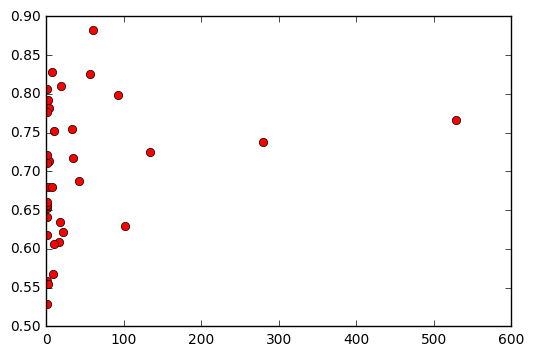

In [42]:
labelsTest, positionBoxTest, spacerTest = regionSelect(dfDatasetTest, ROI, seqRange)
Xtest = positionBoxTest.values
rankPredict = reg.predict(Xtest)

print(stats.spearmanr(dfDatasetTest['mean_score'].values,rankPredict))
plt.plot(dfDatasetTest['mean_score'].values,rankPredict, 'ro')

<img src="images/inbio.png" align="top" width="100%"> 

- 52 promoters
- sequence range: $   [-53,+4]$
- high level of variation over whole sequence


In [46]:
dfDatasetTest = pd.read_csv("data/inbio_lib.csv")
dfDatasetTest.iloc[:5,:3].style.set_properties(**{"font-size":"9px"})

SpearmanrResult(correlation=0.024503212316951642, pvalue=0.86310286460841112)


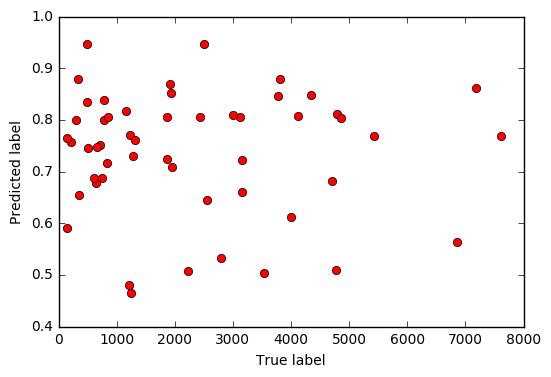

In [44]:
labelsTest, positionBoxTest, spacerTest = regionSelect(dfDatasetTest, ROI, seqRange)
Xtest = positionBoxTest.values
rankPredict = reg.predict(Xtest)

print(stats.spearmanr(dfDatasetTest['mean_score'].values,rankPredict))
plt.plot(dfDatasetTest['mean_score'].values,rankPredict, 'ro')
plt.xlabel('True label')
plt.ylabel('Predicted label')

# Remarks

- Model is only strong in predicting changes within and in close range of the -35 and -10 regions
- Training data only encompasses the $[-47,1]$ region
- Simple features are used, giving a simple yet robust model
- Model has been optimized (used loss function) to minimize difference between predicted and true label
- Model cannot be further optimized with multiple dataset


# Future work and focus



## Ranked based optimalization methods

- rank dependent loss function
- optimalization over different datasets.


In [49]:
import pandas as pd
dfDatasetTest = pd.read_csv("data/pairedDBanalysis.csv")
dfDatasetTest.iloc[:5]

,Unnamed: 0,ID_1,ID_2,sequence_1,sequence_2,score_1,score_2,rank,35boxstart_1,35boxstart_2,10boxstart_1,10boxstart_2
0,0,apFAB29,apFAB30,AAAAAGAGTATTGACTTAAAGTCTAACCTATAGGATACTTACAGCCAT,AAAAAGAGTATTGACTTAAAGTCTAACCTATAGGTATAATGTGTGGAT,565.95,731.46,-1,10,10,34,34
1,1,apFAB29,apFAB31,AAAAAGAGTATTGACTTAAAGTCTAACCTATAGGATACTTACAGCCAT,AAAAAGAGTATTGACTTAAAGTCTAACCTATAGGTATAATAGATTCAT,565.95,781.83,-1,10,10,34,34
2,2,apFAB29,apFAB32,AAAAAGAGTATTGACTTAAAGTCTAACCTATAGGATACTTACAGCCAT,AAAAAGAGTATTGACTTAAAGTCTAACCTATAGGCATAATTATTTCAT,565.95,645.52,-1,10,10,34,34
3,3,apFAB29,apFAB33,AAAAAGAGTATTGACTTAAAGTCTAACCTATAGGATACTTACAGCCAT,AAAAAGAGTATTGACTTAAAGTCTAACCTATAGGTAGATTTAACGTAT,565.95,340.48,1,10,10,34,34
4,4,apFAB29,apFAB34,AAAAAGAGTATTGACTTAAAGTCTAACCTATAGGATACTTACAGCCAT,AAAAAGAGTATTGACTATTAATCATCCGGCTCGATACTTACAGCCAT,565.95,14.63,1,10,10,34,33


<img src="images/cnn_DNA.png" align="right" width="50%"> 

## Neural Networks
- protein DNA interactions
- deep neural networks and convolution

<img src="images/dnn_DNA.png" align="bottom" width="100%">